In [1]:
import yahoo_fin.stock_info
import requests_html
from yahoo_fin.stock_info import *
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
election_dates = [
    "10-31-2020",
    "10-31-2016",
    "10-31-2012",
    "10-31-2008",
    "10-31-2004",
    "10-31-2000",
    "10-31-1996",
    "10-31-1992",
    "10-31-1988",
    "10-31-1984",
    "10-31-1980",
    "10-31-1976",
    "10-31-1972",
    "10-31-1968",
    "10-31-1964",
    "10-31-1960",
    "10-31-1956",
    "10-31-1952",
    "10-31-1948",
    "10-31-1944"]

election_dates2 = [
    "11-07-2020",
    "11-07-2016",
    "11-07-2012",
    "11-07-2008",
    "11-07-2004",
    "11-07-2000",
    "11-07-1996",
    "11-07-1992",
    "11-07-1988",
    "11-07-1984",
    "11-07-1980",
    "11-07-1976",
    "11-07-1972",
    "11-07-1968",
    "11-07-1964",
    "11-07-1960",
    "11-07-1956",
    "11-07-1952",
    "11-07-1948",
    "11-07-1944"
    ]

prediction_dates = [
    "7-31-2020",
    "7-31-2016",
    "7-31-2012",
    "7-31-2008",
    "7-31-2004",
    "7-31-2000",
    "7-31-1996",
    "7-31-1992",
    "7-31-1988",
    "7-31-1984",
    "7-31-1980",
    "7-31-1976",
    "7-31-1972",
    "7-31-1968",
    "7-31-1964",
    "7-31-1960",
    "7-31-1956",
    "7-31-1952",
    "7-31-1948",
    "7-31-1944"
]

prediction_dates2 = [
    "8-07-2020",
    "8-07-2016",
    "8-07-2012",
    "8-07-2008",
    "8-07-2004",
    "8-07-2000",
    "8-07-1996",
    "8-07-1992",
    "8-07-1988",
    "8-07-1984",
    "8-07-1980",
    "8-07-1976",
    "8-07-1972",
    "8-07-1968",
    "8-07-1964",
    "8-07-1960",
    "8-07-1956",
    "8-07-1952",
    "8-07-1948",
    "8-07-1944"
]


market_change = []
for i, prediction,prediction2,election, election2 in zip(range(len(prediction_dates)),prediction_dates, prediction_dates2, election_dates, election_dates2):
    start = get_data("^GSPC",start_date=prediction, end_date=prediction2, index_as_date = False, interval = "1wk")
    end = get_data("^GSPC",start_date=election, end_date=election2, index_as_date = False, interval = "1wk")
    market_change.append(((end["close"].iloc[0] - start["close"].iloc[0])/(start["close"].iloc[0]))*100)
market_change[0] = market_change[0] - 0.2
market_change[15] = market_change[15] - 0.5
market_change[7] = market_change[7] - 0.5

years = [
    "2020",
    "2016",
    "2012",
    "2008",
    "2004",
    "2000",
    "1996",
    "1992",
    "1988",
    "1984",
    "1980",
    "1976",
    "1972",
    "1968",
    "1964",
    "1960",
    "1956",
    "1952",
    "1948",
    "1944"
]

outcomes = [
    "dodgerblue",
    "orangered",
    "dodgerblue",
    "dodgerblue",
    "orangered",
    "orangered",
    "dodgerblue",
    "dodgerblue",
    "orangered",
    "orangered",
    "orangered",
    "dodgerblue",
    "orangered",
    "orangered",
    "dodgerblue",
    "dodgerblue",
    "orangered",
    "orangered",
    "dodgerblue",
    "dodgerblue"
]

labels = [
    "red",
    "red",
    "dodgerblue",
    "red",
    "dodgerblue",
    "red",
    "dodgerblue",
    "red",
    "dodgerblue",
    "dodgerblue",
    "red",
    "red",
    "dodgerblue",
    "red",
    "dodgerblue",
    "red",
    "dodgerblue",
    "red",
    "dodgerblue",
    "dodgerblue"
]

labels1 = [
    "Replace",
    "Replace",
    "Reelected",
    "Replace",
    "Reelected",
    "Replace",
    "Reelected",
    "Replace",
    "Reelected",
    "Reelected",
    "Replace",
    "Replace",
    "Reelected",
    "Replace",
    "Reelected",
    "Replace",
    "Reelected",
    "Replace",
    "Reelected",
    "Reelected"
]

labels2 = [
    "Biden [D]",
    "Trump [R]",
    "Obama [D]",
    "Obama [D]",
    "Bush [R]",
    "Bush [R]",
    "Clinton [D]",
    "Clinton [D]",
    "Bush [R]",
    "Reagan [R]",
    "Reagan [R]",
    "Carter [D]",
    "Nixon [R]",
    "Nixon [R]",
    "LBJ [D]",
    "JFK [D]"
    "Eisenhower [R]",
    "Eisenhower [R]",
    "Truman [D]",
    "FDR [D]",
]

Text(0.5, 1.0, 'S&P 500 Election Results')

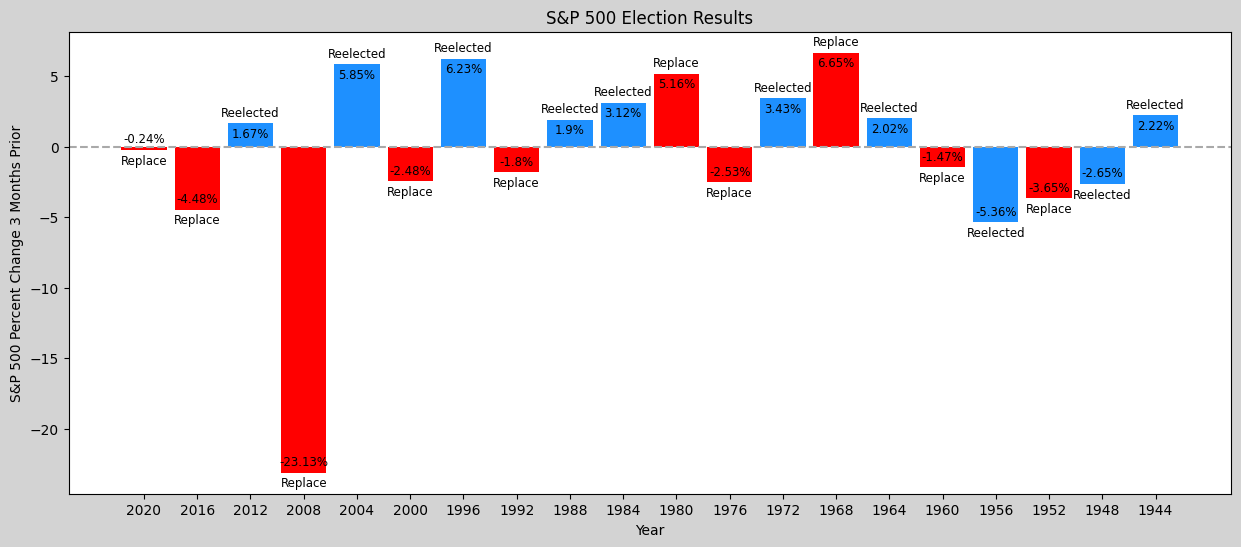

In [3]:
plt.figure(facecolor = "lightgray", figsize=(15,6))
ax = plt.gca()
ax.set_facecolor("white")
plt.bar(years,market_change, color = labels, width = 0.85)
for i in range(len(outcomes)):
    if market_change[i] > 0:
        plt.text(i, market_change[i] + 0.5, labels1[i], ha = "center", fontsize = 8.5)
        plt.text(i, market_change[i] - 1, f"{round(market_change[i], ndigits = 2)}%", ha = "center", fontsize = 8.5, color = "black")
    elif market_change[i] < 0:
        plt.text(i, market_change[i] - 1, labels1[i], ha = "center", fontsize = 8.5)
        plt.text(i, market_change[i] + 0.5, f"{round(market_change[i], ndigits= 2)}%", ha = "center", fontsize = 8.5, color = "black")
plt.margins(0.05)
plt.axhline(y=0, color = "darkgray", linestyle = "--")
plt.xlabel("Year")
plt.ylabel("S&P 500 Percent Change 3 Months Prior")
plt.title("S&P 500 Election Results")

In [4]:
election_dates = [
    "10-31-2020",
    "10-31-2016",
    "10-31-2012",
    "10-31-2008",
    "10-31-2004",
    "10-31-2000",
    "10-31-1996",
    "10-31-1992",
    "10-31-1988",
    "10-31-1984",
    "10-31-1980",
    "10-31-1976",
    "10-31-1972",
    "10-31-1968",
    "10-31-1964",
    "10-31-1960",
    "10-31-1956",
    "10-31-1952",
    "10-31-1948",
    "10-31-1944"]

election_dates2 = [
    "11-07-2020",
    "11-07-2016",
    "11-07-2012",
    "11-07-2008",
    "11-07-2004",
    "11-07-2000",
    "11-07-1996",
    "11-07-1992",
    "11-07-1988",
    "11-07-1984",
    "11-07-1980",
    "11-07-1976",
    "11-07-1972",
    "11-07-1968",
    "11-07-1964",
    "11-07-1960",
    "11-07-1956",
    "11-07-1952",
    "11-07-1948",
    "11-07-1944"
    ]

prediction_datesA = [
    "5-31-2021",
    "5-31-2017",
    "5-31-2013",
    "5-31-2009",
    "5-31-2005",
    "5-31-2001",
    "5-31-1997",
    "5-31-1993",
    "5-31-1989",
    "5-31-1985",
    "5-31-1981",
    "5-31-1977",
    "5-31-1973",
    "5-31-1969",
    "5-31-1965",
    "5-31-1961",
    "5-31-1957",
    "5-31-1953",
    "5-31-1949",
    "5-31-1945"
]

prediction_datesA2 = [
    "6-07-2021",
    "6-07-2017",
    "6-07-2013",
    "6-07-2009",
    "6-07-2005",
    "6-07-2001",
    "6-07-1997",
    "6-07-1993",
    "6-07-1989",
    "6-07-1985",
    "6-07-1981",
    "6-07-1977",
    "6-07-1973",
    "6-07-1969",
    "6-07-1965",
    "6-07-1961",
    "6-07-1957",
    "6-07-1953",
    "6-07-1949",
    "6-07-1945"
]


market_change2 = []
for i, prediction,prediction2,election, election2 in zip(range(len(prediction_dates)),prediction_datesA, prediction_datesA2, election_dates, election_dates2):
    end = get_data("^GSPC",start_date=prediction, end_date=prediction2, index_as_date = False, interval = "1wk")
    start = get_data("^GSPC",start_date=election, end_date=election2, index_as_date = False, interval = "1wk")
    market_change2.append(((end["close"].iloc[0] - start["close"].iloc[0])/(start["close"].iloc[0]))*100)


In [5]:
RR = [market_change2[16], market_change2[12], market_change2[9], market_change2[8], market_change2[4]]
DD = [market_change2[19], market_change2[18], market_change2[14], market_change2[6], market_change2[2]]
DR = [market_change2[17], market_change2[13], market_change2[10], market_change2[5], market_change2[1]]
RD = [market_change2[15], market_change2[11], market_change2[7], market_change2[3], market_change2[0]]

change = [statistics.mean(DR), statistics.mean(RR),
          statistics.mean(DD), statistics.mean(RD)]

shifters = [
    "Democrat to Republican",
    "Republican to Republican",
    "Democrat to Democrat",
    "Republican to Democrat"
]

colours = ["rebeccapurple", "red", "dodgerblue", "rebeccapurple"]

Text(0.5, 0, 'S&P 500 Election Results')

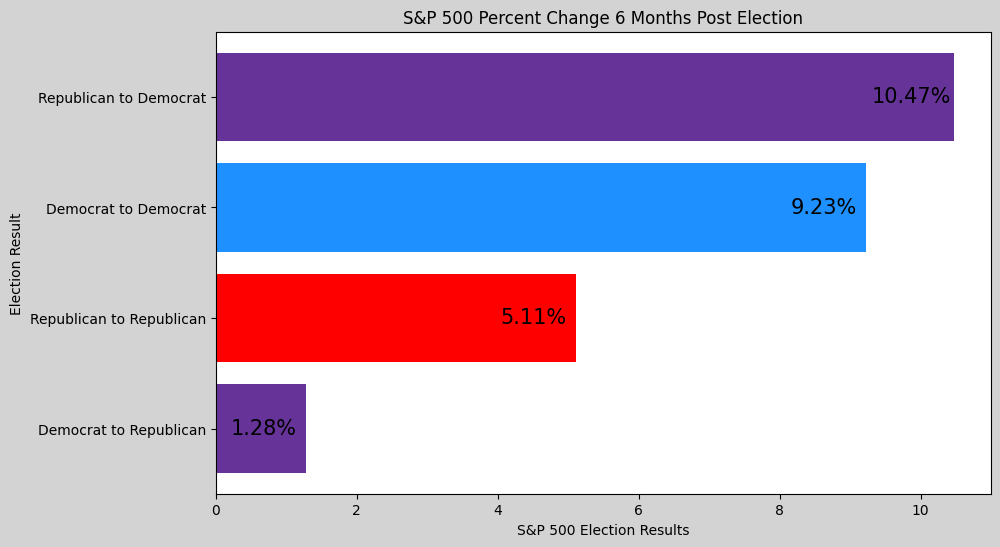

In [6]:
plt.figure(facecolor = "lightgray", figsize=(10,6))
ax = plt.gca()
ax.set_facecolor("white")
plt.barh(shifters,change, color = colours)
for i in range(len(change)):
    plt.text(change[i] -0.6, i - 0.05 , f"{round(change[i], ndigits = 2)}%", ha = "center", fontsize = 15, color = "black")
plt.margins(0.05)
plt.ylabel("Election Result")
plt.title("S&P 500 Percent Change 6 Months Post Election")
plt.xlabel("S&P 500 Election Results")

Text(0.5, 0, 'S&P 500 Election Results')

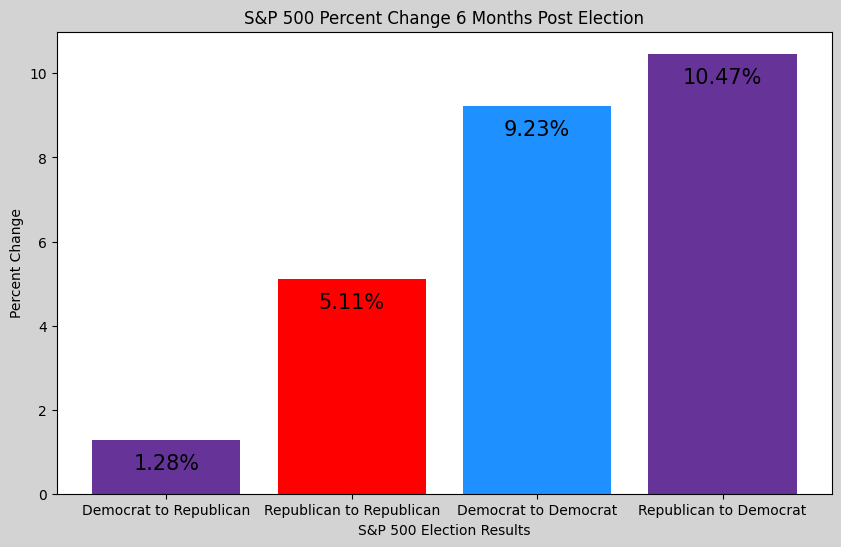

In [7]:
plt.figure(facecolor = "lightgray", figsize=(10,6))
ax = plt.gca()
ax.set_facecolor("white")
plt.bar(shifters,change, color = colours)
for i in range(len(change)):
    plt.text(i, change[i] -0.7, f"{round(change[i], ndigits = 2)}%", ha = "center", fontsize = 15, color = "black")
plt.margins(0.05)
plt.title("S&P 500 Percent Change 6 Months Post Election")
plt.ylabel("Percent Change")
plt.xlabel("S&P 500 Election Results")